Table of Contents: 

1. Data and Librariers import
2. Correlation visualizations:
- Create a correlation matrix heatmap (colored).
- Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.
- Create a pair plot of the entire data set.
- Create a categorical plot and interpret the results.
- Define any hypotheses that you can at this point.

# Importing libraries and dataframes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Importing Dataframes
path = r'C:\Users\franz\Documents\Exercise_6\01_Data\prepared_data\cleaned_data'
df_all = pd.read_csv(os.path.join(path, 'combined_data.csv'), usecols = all)

In [3]:
df_relevant = df_all.filter(['review_score','delivery_time_in_days','customer_state', 'payment_value', 'product_weight_g', 'price', 'product_photos_qty', 'product_description_length', 'payment_installments', 'customer_zip_code_prefix'], axis=1)

In [4]:
df_relevant.head()

,review_score,delivery_time_in_days,customer_state,payment_value,product_weight_g,price,product_photos_qty,product_description_length,payment_installments,customer_zip_code_prefix
0,4,15,SP,18.12,500.0,29.99,4.0,268.0,1,3149
1,4,15,SP,2.00,500.0,29.99,4.0,268.0,1,3149
2,4,15,SP,18.59,500.0,29.99,4.0,268.0,1,3149
3,4,12,SP,37.77,500.0,29.99,4.0,268.0,3,3366
4,5,12,SP,37.77,500.0,29.99,4.0,268.0,1,2290


In [5]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

# Creating correlation visualizations 

### Create a correlation matrix heatmap (colored).

Text(0.5, 1.0, 'Correlation Matrix')

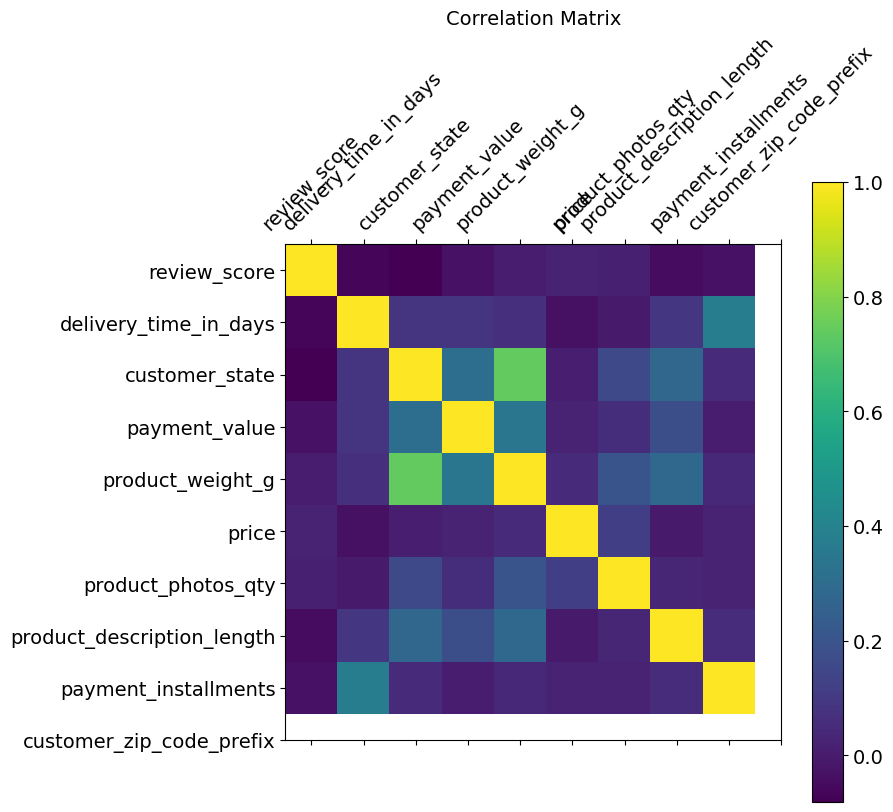

In [6]:
# correlation matrix

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_relevant.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_relevant.shape[1]), df_relevant.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_relevant.shape[1]), df_relevant.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

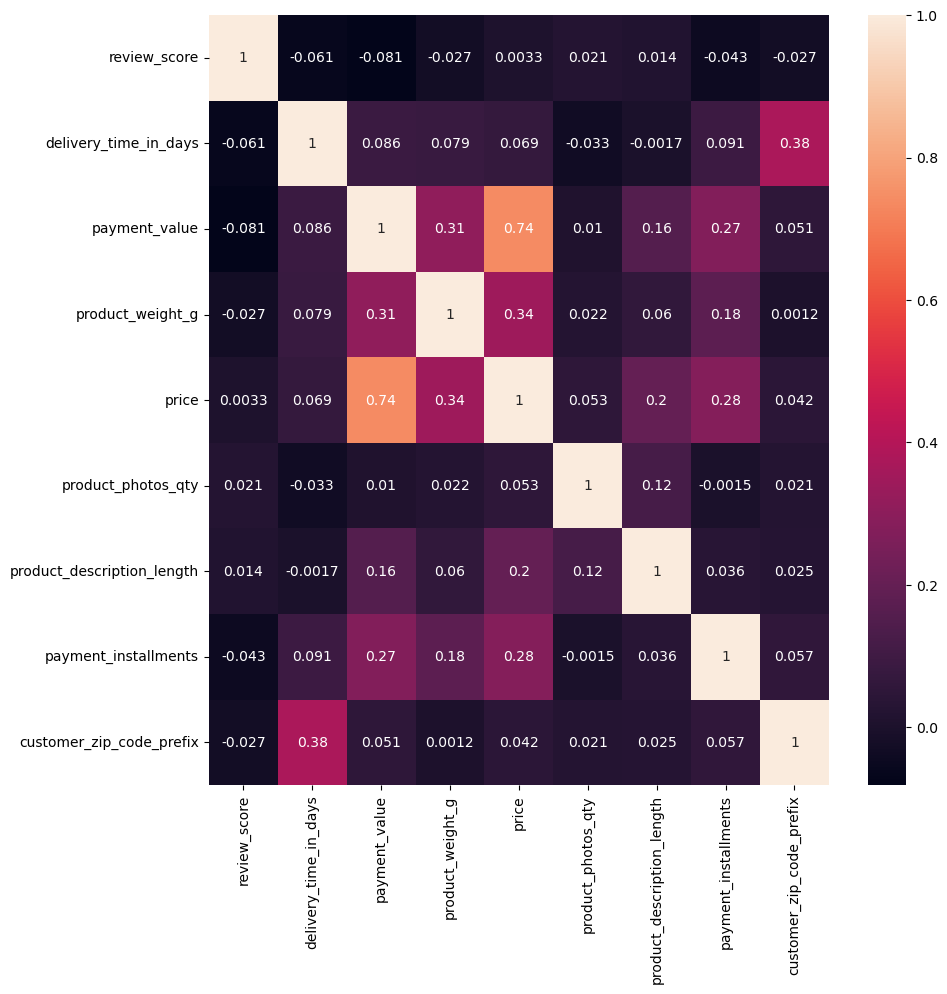

In [7]:
# Heatmap

# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_relevant.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

Relationship definition:
- 0: no relationship
- 0.1–0.3: weak relationship
- 0.3–0.5: moderate relationship
- 0.5–1.0: strong relationship

Relationships in the heatmap:
- delivery_time_in_days vs. customer_zip_ocde_prefix: moderate relationship (the higher the zip code prefix, the higher is the delivery time)
- product_weight_g vs. payment_value: moderate relationship (heavier products tend to be more expensive)
- price vs. payment_value: strong relationship (should ideally be 1, but customers for sure return products or get price discounts in case something is wrong with the product)
- price vs. payment_installments: moderate relationship (more expensive products tend to be paid in rates)
- price vs. product_description_length: weak relationship (more expensive products tend to have a longer product description)
- product_weight vs. payment_value: moderate relationship (heavier products are more expensive)
- product_photos_qty vs. product_description_length: weak relationship (complex products are explained by many photos and more text)


### Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.

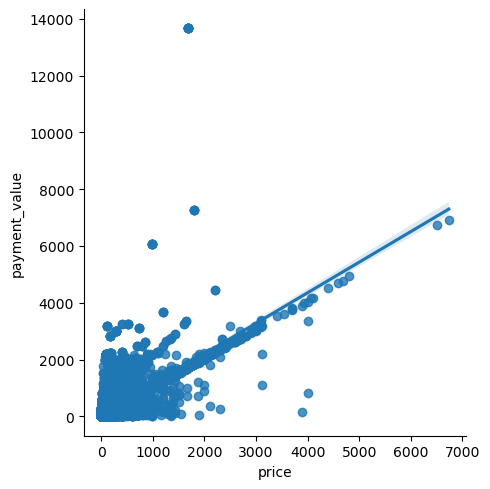

In [8]:
# Create a Scatterplot for price vs. payment_value in seaborn

sns.lmplot(x = 'price', y = 'payment_value', data = df_relevant)

There is a great degree of variability as there are many data points that do not fit the correlation line. However, this is explainable. For many products, zero dollars or less than the products price were paid. Those are supposed to be articles that were returned or reduced in price for any reason, e.g. based on customer complaints. The lots of payment_values that are greater than the price appear because the payment_value is not explicitly splitted on single products, those are the total  amounts of payment per order. So, if a customer ordered more than one product, then the payment_value will be shown higher than the price of the product.

### Create a pair plot of the entire data set.

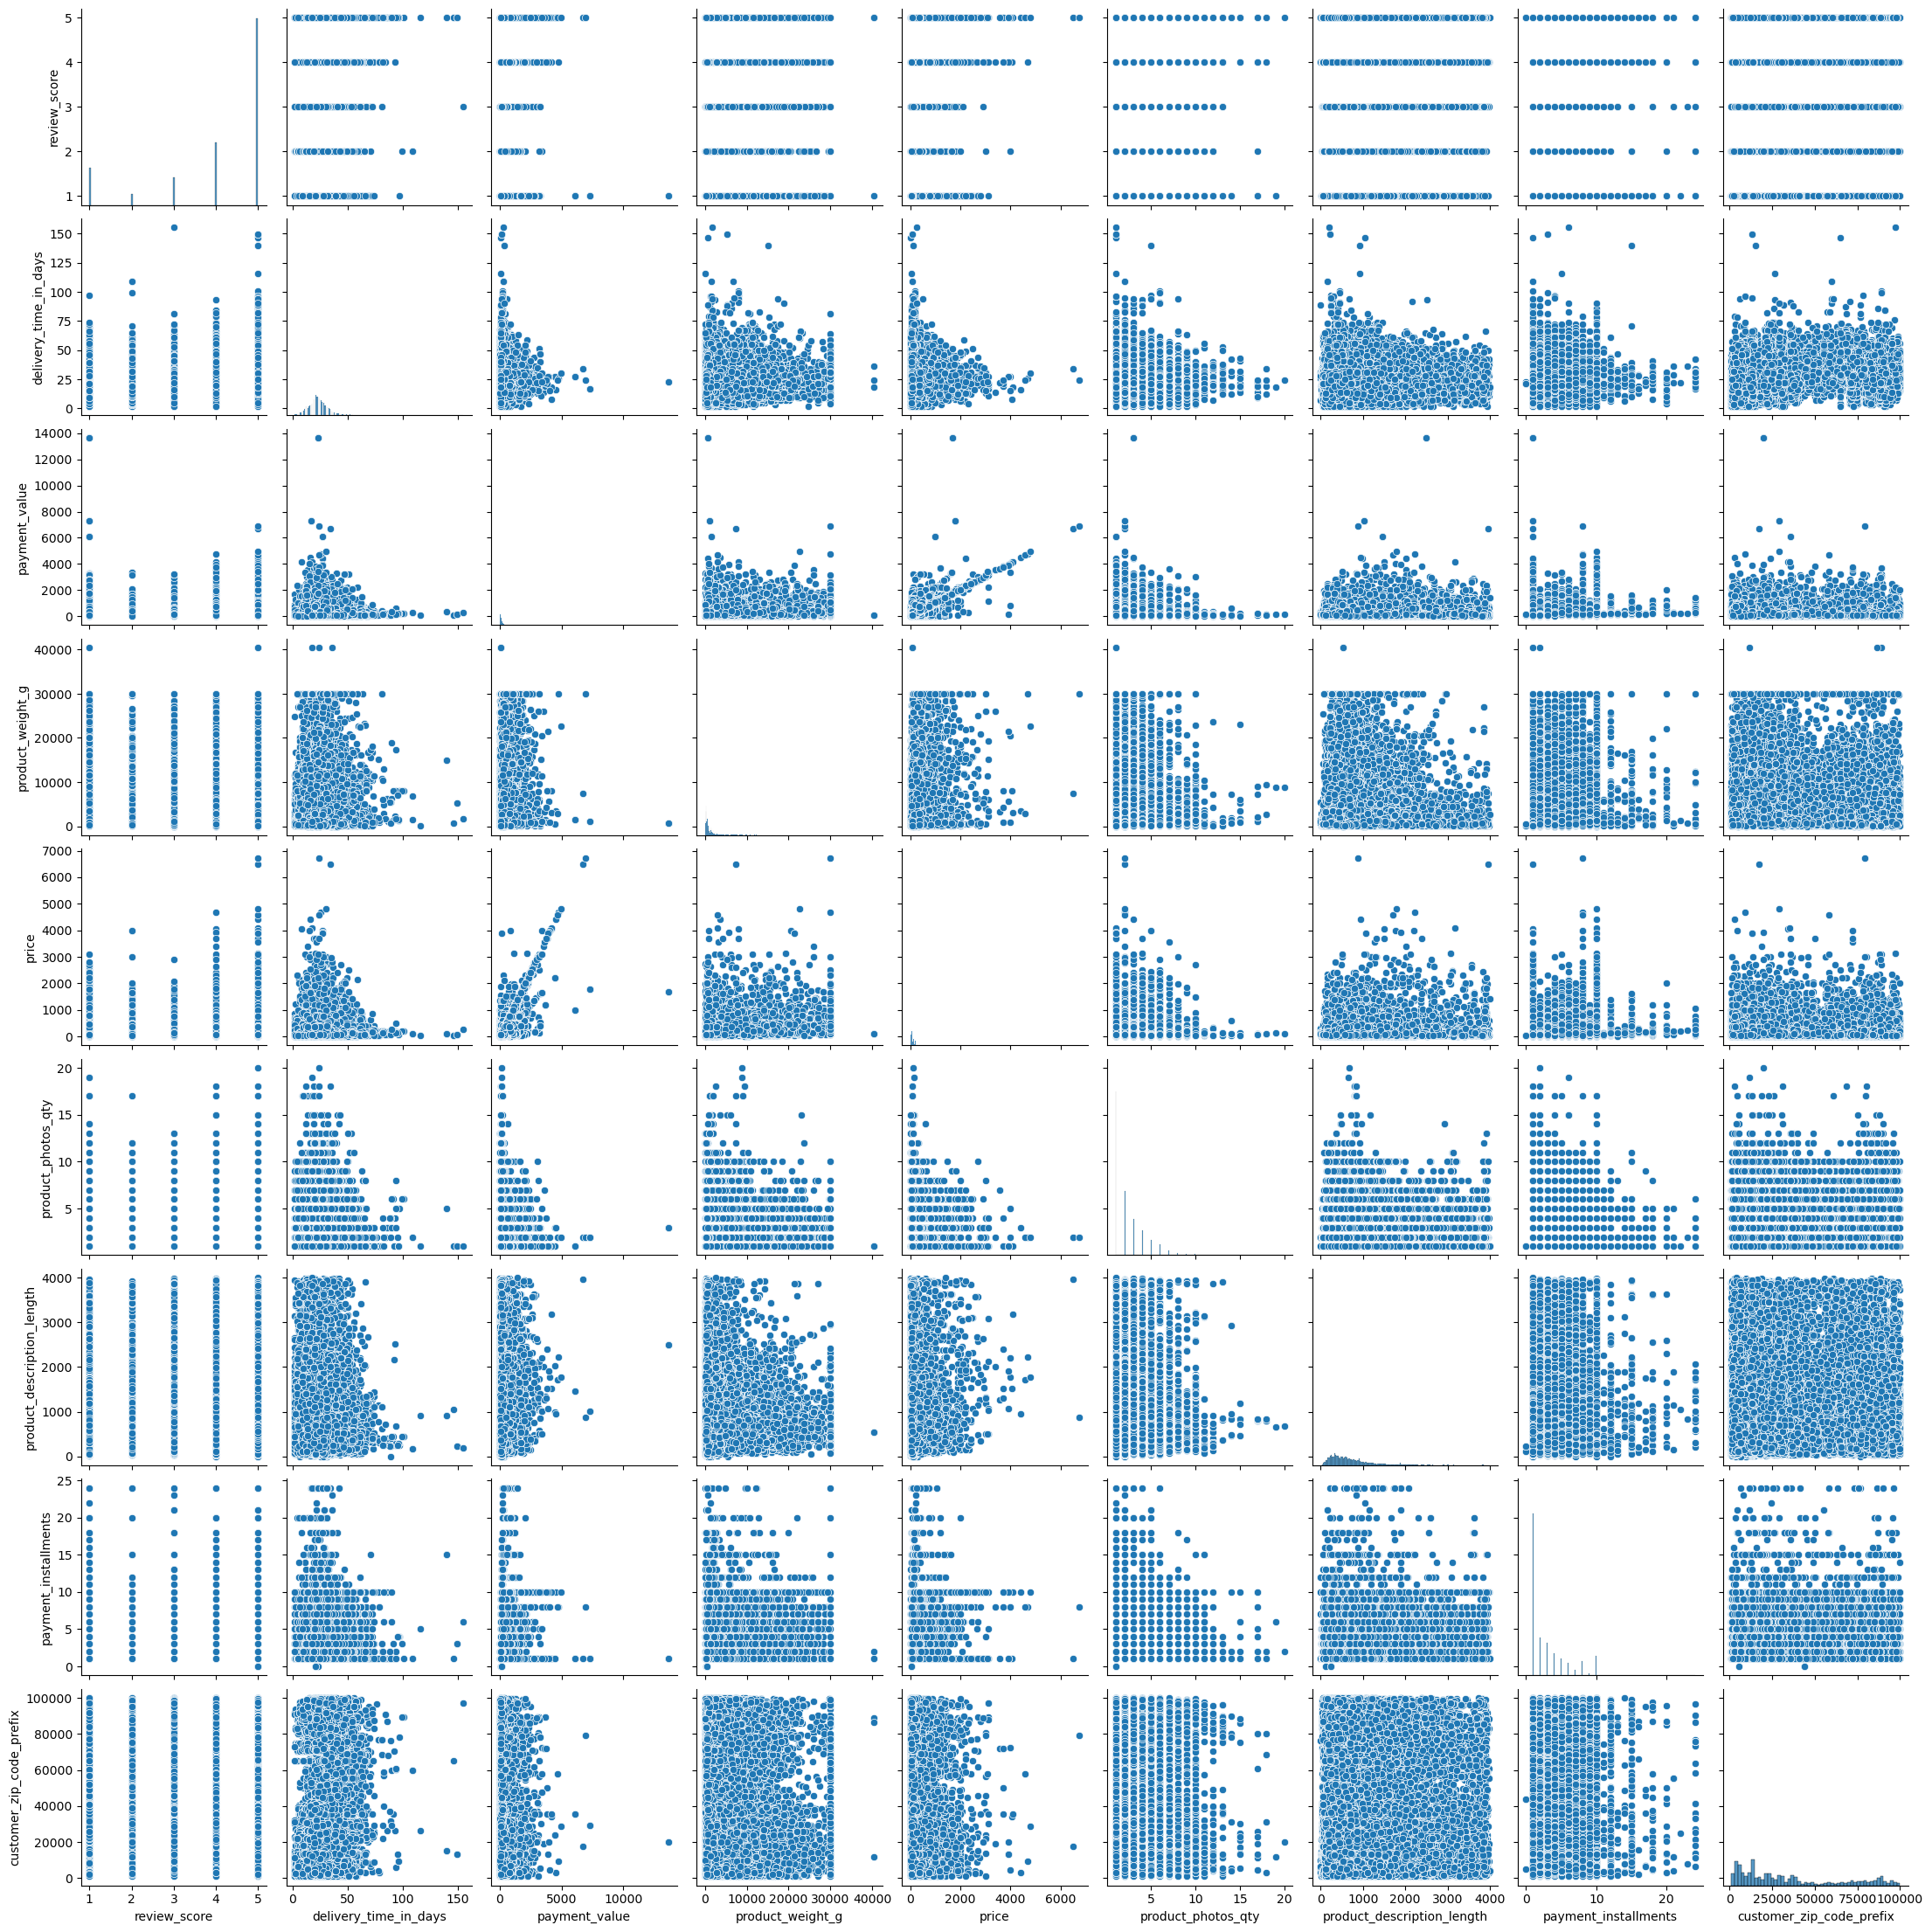

In [9]:
# Create a pair plot 

g = sns.pairplot(df_relevant)

Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.

Looking at the histograms, it can fortunately be said that the majority of the review_scores are very good (five stars). The delivery time seems like a normal distribution, meaning the customers have a good understanding and are used to how long the delivery takes.

The scatterplots help determining whether relationships between above mentioned variables possess a linear or non-linear trend:

- delivery_time_in_days vs. customer_zip_ocde_prefix: moderate relationship - non-linear trend
- product_weight_g vs. payment_value: moderate relationship - non-linear trend
- price vs. payment_value: strong relationship - linear trend
- price vs. payment_installments: moderate relationship - non-linear trend
- price vs. product_description_length: weak relationship - non-linear trend
- product_weight vs. payment_value: weak relationship - non-linear trend
- product_photos_qty vs. product_description_length: weak relationship - non-linear trend

Unfortunately, no relationship between the review_score and any variable can be found. Therefore, I would like to further investigate the impacts on the review_score. Probably, some suppliers are better than others, leading to higher scores, but this can not be analyzed by correlation graphs.

### Create a categorical plot and interpret the results.

<AxesSubplot:xlabel='price', ylabel='Count'>

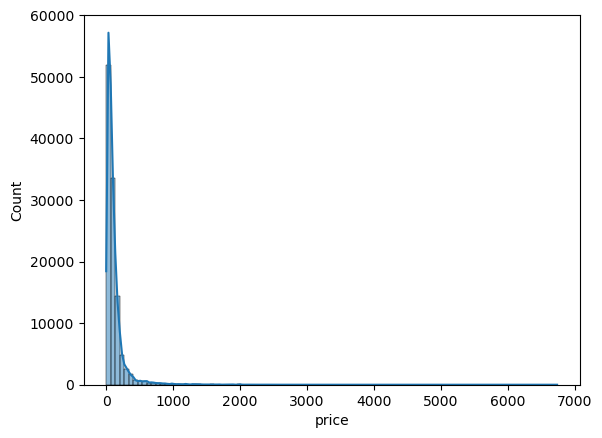

In [10]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_relevant['price'], bins = 100, kde = True)

In [11]:
df_relevant.loc[df_relevant['price'] < 100, 'Price category'] = 'Low price'

In [12]:
df_relevant.loc[(df_relevant['price'] >= 100) & (df_relevant['price'] < 500), 'Price category'] = 'Middle price'

In [13]:
df_relevant.loc[df_relevant['price'] > 500, 'Price category'] = 'High price'

In [14]:
df_relevant['Price category'].value_counts(dropna = False)

Low price       72993
Middle price    37008
High price       3194
NaN                21
Name: Price category, dtype: int64

In [ ]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="price", y="review_score", hue="Price category", data=df_relevant)

It seems the customers rate a product especially when they are extremely satisfied with four or five stars, or when they are disappointed, with one star. At first glance, it looks like high-priced products are rated more often (but this may be due to scaling of the y-axis).

### Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

Questions of previous task: 

- Why are some products more popular than others?: So far, no correlation between the review_score and any other variable was found. 
- Which customers are the best customers?: Customer_state in customers.csv vs. payment_value in payments.csv, was not yet investigated
- Is the delivery time about the same independent of the products size and weight?: Delivery_time_in_days in orders.csv vs. product_weight_g in products.csv, a moderate relationship was found, meaning the heavier the product is, the longer can the delivery time be expected.
- When does Olist deliver their products, throughout the whole year?: not yet determined
- How long is the usual delivery time?: 23 days on average
- Which customers are the best customers?: not yet determined


New questions:

- which sellers are most successful? 
- what product categories are most successful?
- what regions have most potential?

### Define any hypotheses that you can at this point. You’ll be testing these later on.

If products of specific categories are sold in specific regions, the customers satisfaction will be high.

If products are sold by specific suppliers, the customer satisfaction will be high.